In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import gdown
import rarfile
import os

# Correct URL after permissions are updated
url = 'https://drive.google.com/uc?id=1wYWliBEngzbXCocXS6mA0T8jP7mkY90r'
output_rar = '/content/New_wheat1.rar'

# Download the RAR file
gdown.download(url, output_rar, quiet=False)

# Check if the downloaded file is valid before extracting
if os.path.exists(output_rar):
    try:
        # Try to open the downloaded file as a RAR file
        with rarfile.RarFile(output_rar, 'r') as rar_ref:
            rar_ref.extractall('/content')
        print("File extracted successfully!")
    except rarfile.NotRarFile:
        print("Error: The downloaded file is not a valid RAR archive.")
else:
    print("Error: File not found.")

Downloading...
From (original): https://drive.google.com/uc?id=1wYWliBEngzbXCocXS6mA0T8jP7mkY90r
From (redirected): https://drive.google.com/uc?id=1wYWliBEngzbXCocXS6mA0T8jP7mkY90r&confirm=t&uuid=52eace71-be15-47b6-9a78-3f63bd836c9c
To: /content/New_wheat1.rar
100%|██████████| 276M/276M [00:04<00:00, 67.3MB/s]


File extracted successfully!


In [4]:
# Path to the extracted dataset folder

dataset = '/content/New_wheat'

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_3        │ (None, 2048)      │ 21,810,976 │ input_layer_5[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_4        │ (None, 1024)      │  3,232,960 │ input_layer_5[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 3072)      │          0 │ functional_3[0][… │
│ (Concatenate)       │                   │            │ functional_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1024)      │  3,146,752 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      4,100 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,194,788 (107.55 MB)

 Trainable params: 16,134,532 (61.55 MB)

 Non-trainable params: 12,060,256 (46.01 MB)

Found 5954 images belonging to 4 classes.
Found 854 images belonging to 4 classes.
Found 1698 images belonging to 4 classes.
Epoch 1/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 84s 261ms/step - accuracy: 0.8563 - loss: 0.3768 - val_accuracy: 0.9637 - val_loss: 0.1072
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.9943 - loss: 0.0204 - val_accuracy: 0.9602 - val_loss: 0.1304
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9789 - val_loss: 0.0696
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.9973 - loss: 0.0074 - val_accuracy: 0.9625 - val_loss: 0.1337
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9801 - val_loss: 0.1023
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.9925 - loss: 0.0221 - val_accuracy: 0.9731 - val_loss: 0.1233
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.9950 - loss: 

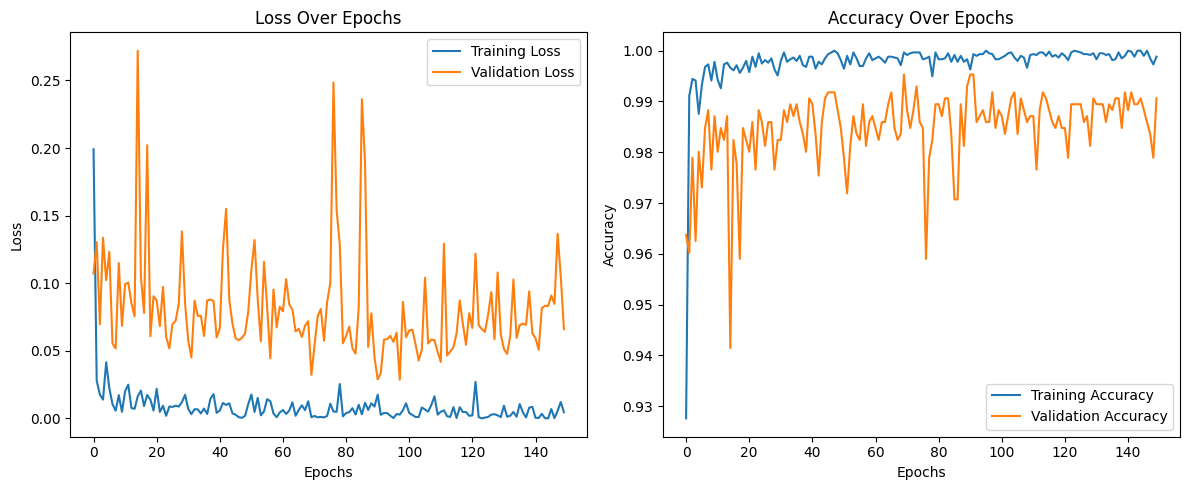

54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 222ms/step

Performance on Test Data
Precision: 0.9848803772453747
Recall: 0.9846878680800942
F1 Score: 0.98470767245753
Accuracy: 0.9846878680800942
Confusion Matrix:
              Brown_Rust  Healthy  Unknown  Yellow_Rust
Brown_Rust          394        1        0            5
Healthy               6      385        0            7
Unknown               1        1      498            0
Yellow_Rust           5        0        0          395


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, LeakyReLU, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Directory for dataset
data_dir = dataset  # Replace 'dataset' with actual dataset path (e.g., './dataset')

# Function to create InceptionV3 architecture with Transfer Learning
def inceptionv3_base(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[:249]:
        layer.trainable = False
    for layer in base_model.layers[249:]:
        layer.trainable = True
    x = base_model.output
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = GlobalAveragePooling2D()(x)
    return Model(base_model.input, x)

# Function to create MobileNet architecture with Transfer Learning
def mobilenet_base(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[:-20]:  # Freeze all but last 20 layers
        layer.trainable = False
    for layer in base_model.layers[-20:]:
        layer.trainable = True
    x = base_model.output
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = GlobalAveragePooling2D()(x)
    return Model(base_model.input, x)

# Build the feature extraction parts
inception_base = inceptionv3_base(input_shape=(224, 224, 3))
mobilenet_base = mobilenet_base(input_shape=(224, 224, 3))

# Define input
inputs = layers.Input(shape=(224, 224, 3))
inception_features = inception_base(inputs)
mobilenet_features = mobilenet_base(inputs)
x = Concatenate()([inception_features, mobilenet_features])
x = Dense(1024, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)

# Create hybrid model
hybrid_model = Model(inputs, outputs)

# Print model summary
hybrid_model.summary()

# Compile the model
hybrid_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Train the hybrid model
history = hybrid_model.fit(train_generator, epochs=150, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate model on test data
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)
    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)
    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the hybrid model
evaluate_model(test_generator, hybrid_model, ['Brown_Rust', 'Healthy', 'Unknown', 'Yellow_Rust'], title="Performance on Test Data")


In [3]:
# Save the model weights with the correct naming convention
weights_path = "/content/hybrid4_model_weights.weights.h5"  # File name ending with .weights.h5
hybrid_model.save_weights(weights_path)
print(f"Weights saved to {weights_path}")

# Download the weights file
from google.colab import files
files.download(weights_path)  # Ensure the correct file path

NameError: name 'hybrid_model' is not defined

In [7]:
import tensorflow as tf


In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(hybrid_model)
tflite_model = converter.convert()

# Save the .tflite file
with open("hybrid_model.tflite", "wb") as f:
    f.write(tflite_model)


NameError: name 'hybrid_model' is not defined

In [17]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(hybrid_model)
tflite_model = converter.convert()

# Save the .tflite file
tflite_model_path = "/content/incp&mob11.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"✅ Model converted to {tflite_model_path}")

# Download the .tflite model
from google.colab import files
files.download(tflite_model_path)


NameError: name 'hybrid_model' is not defined

In [6]:
import tensorflow as tf

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(hybrid_model)
# Ensure compatibility with older TFLite versions
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Use TensorFlow Lite's built-in ops
    tf.lite.OpsSet.SELECT_TF_OPS  # Allow TensorFlow ops if needed
]
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optimize for performance
tflite_model = converter.convert()

# Save the model
with open("wheat_model_4.tflite", "wb") as f:
    f.write(tflite_model)


NameError: name 'hybrid_model' is not defined